In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [159]:
df=pd.read_csv('Titanic_Data.csv', sep =',')

In [160]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Wrangling

In [161]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
df.shape

(891, 12)

In [163]:
df.isnull().sum()/df.shape[0] *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### EDA

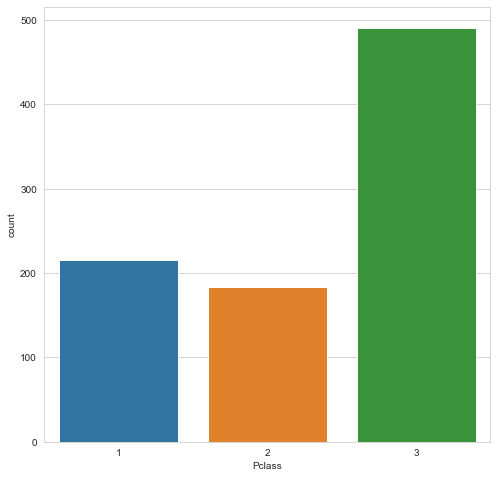

In [164]:
plt.figure(figsize=(8,8))
sns.countplot(df['Pclass'])
plt.show()

In [165]:
df.groupby(['Pclass'])['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [166]:
# Pclass in percentages
np.round(df.groupby(['Pclass'])['PassengerId'].count()/df.shape[0] *100, 2)

Pclass
1    24.24
2    20.65
3    55.11
Name: PassengerId, dtype: float64

In [167]:
np.round(df.groupby(['Pclass'])['Age'].mean(), 2)

Pclass
1    38.23
2    29.88
3    25.14
Name: Age, dtype: float64

#### Distribution of gender

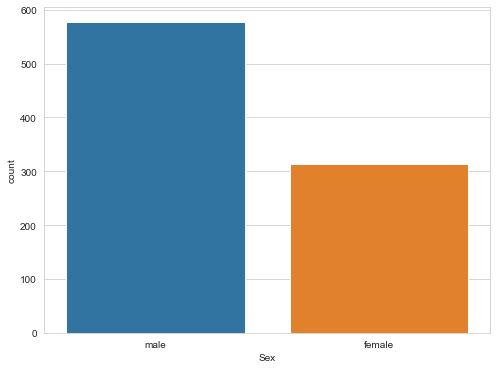

In [168]:
plt.figure(figsize=(8,6))
sns.countplot(df['Sex'])
plt.show()

In [169]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [170]:
np.round(df['Sex'].value_counts()/df['Sex'].shape[0] * 100, 2)

male      64.76
female    35.24
Name: Sex, dtype: float64

#### Survived Passengers

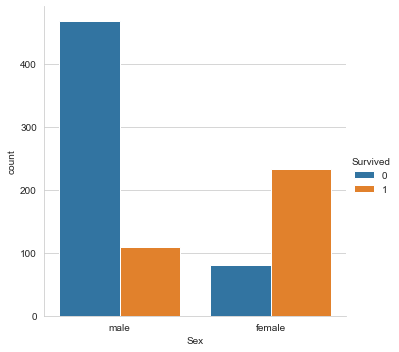

In [171]:
sns.set_style('whitegrid')
sns.catplot(x= 'Sex', hue = 'Survived', kind = 'count', data = df)
plt.show()

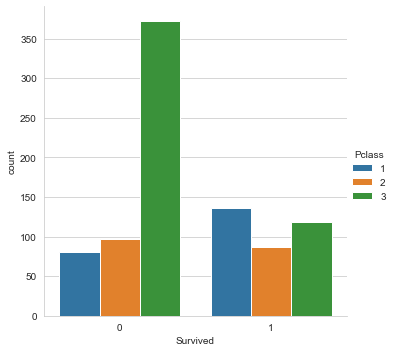

In [172]:
sns.set_style('whitegrid')
sns.catplot(x= 'Survived', hue = 'Pclass', kind = 'count', data = df)
plt.show()

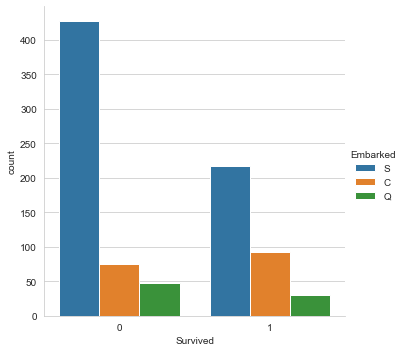

In [173]:
sns.set_style('whitegrid')
sns.catplot(x= 'Survived', hue = 'Embarked', kind = 'count', data = df)
plt.show()

#### We can also use crosstab for the same in tabular form

In [174]:
pd.crosstab(df['Survived'], df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [175]:
pd.crosstab(df['Sex'], df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [176]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


#### Handling missing values

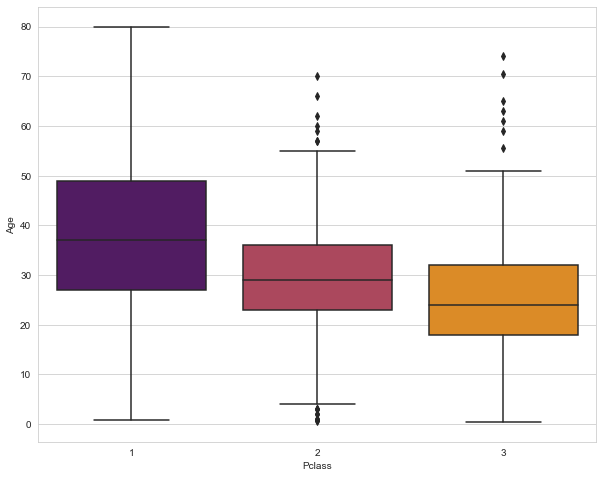

In [177]:
#Drawing a box plot to check Age outliers
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.boxplot(x = 'Pclass', y='Age', data = df, palette ='inferno')
plt.show()

##### Alternate Method of replacing missing data
    *Checking Age by Titles, ie Mr, Master, Dr, Mrs, etc

In [178]:
#we use Series.str.extract function to extract the title from names
df['Title']=df.Name.str.extract(' ([A-za-z]+)\.', expand = False)

In [179]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [180]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [181]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [182]:
df['Title'] = df['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir',
                                                   'Col', 'Capt','Countess','Jonkheer'],'Rare')

In [183]:
df['Title'] = df['Title'].replace('Mlle','Miss')
df['Title'] = df['Title'].replace('Ms','Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')

In [184]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [185]:
df[['Age','Title']].groupby(['Title']).median()

,Age
Title,
Master,3.5
Miss,21.0
Mr,30.0
Mrs,35.0
Rare,48.5


### Using Custom Simple Imputer

In [186]:
def imputer_age (cols):
    Age= cols[0]
    Title = cols[1]
    if Age == pd.isnull:
        if Title == 'Master':
            return 3.5
        if Title == 'Miss':
            return 21
        if Title == 'Mr':
            return 30
        if Title == 'Mrs':
            return 35
        else:
            return 48.5
    else:
        return Age

In [187]:
df['Age'] = df[['Age','Title']].apply(imputer_age, axis =1)

In [188]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [189]:
#Drop Passenger ID and Cabin, Name, Ticket number since those aren't required in Algorithm
df.drop(['PassengerId','Cabin', 'Name', 'Ticket'], axis =1, inplace = True)

In [190]:
#Drop null values of Embarked column
df.dropna(inplace = True)

In [191]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

### Data Preprocessing

In [192]:
#OHE
df = pd.get_dummies (data = df, drop_first = True)

In [193]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,0,0


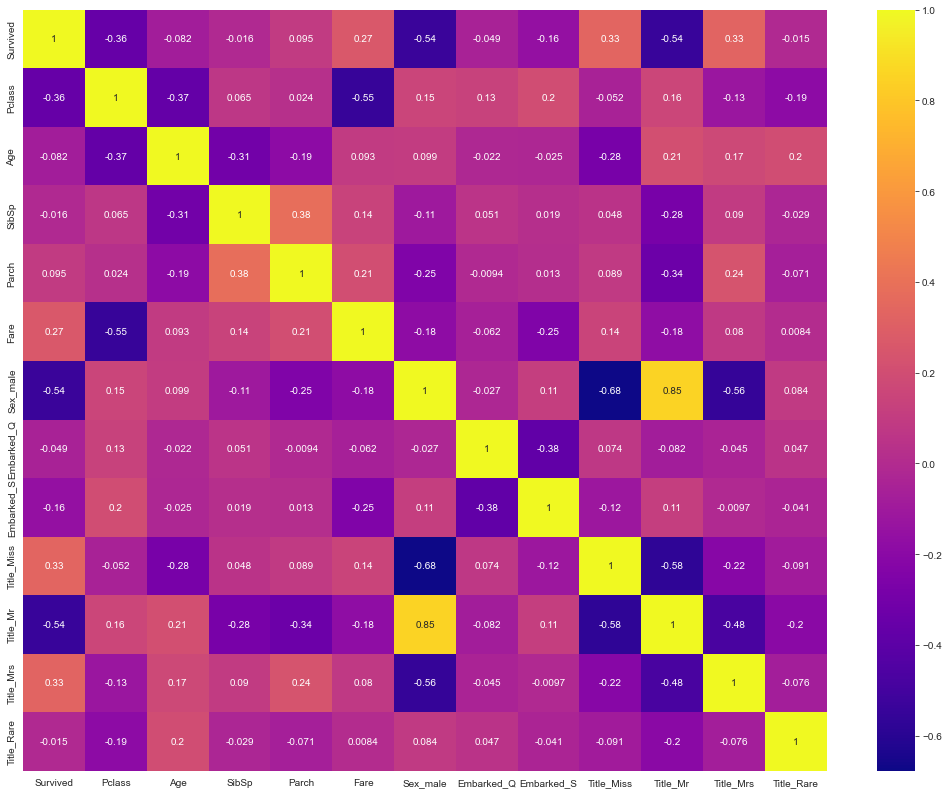

In [194]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma')
plt.show()

In [196]:
x_features = df.drop(['Sex_male', 'Survived'], axis =1)
y_target = df['Survived']

### Cross Validation
    *Splitting Data in to test- train

In [222]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.2, random_state = 1)

In [223]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver= 'liblinear', C = 1e5, max_iter = 1e7, penalty = 'l2')

### Logistic Regression

In [224]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=100000.0, max_iter=10000000.0, solver='liblinear')

In [225]:
log_reg.score(x_test,y_test)

0.7902097902097902

#### Prediction

In [226]:
y_pred=log_reg.predict(x_test)

#### Classification Metrics
    *Confusion Matrix
    *Classification report

In [228]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix (y_test, y_pred)

array([[71, 14],
       [16, 42]])

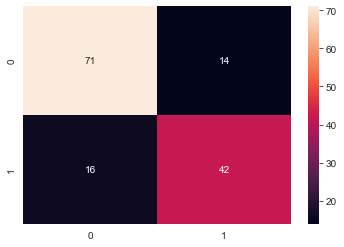

In [230]:
sns.heatmap(confusion_matrix (y_test, y_pred), annot = True)
plt.show()

In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.75      0.72      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143

